In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv

In [0]:
Id = []
Datafollowers = []
Datarate = []
FuzzySetFollowers = []
FuzzySetRate = []

In [0]:
f = open('influencers.csv', 'r')
data = csv.reader(f)
for row in data:
  x = row[0]
  Id.append(x)
  Datafollowers.append(row[1])
  Datarate.append(row[2])
Id.pop(0) 
Datafollowers.pop(0) 
Datarate.pop(0)
f.close()

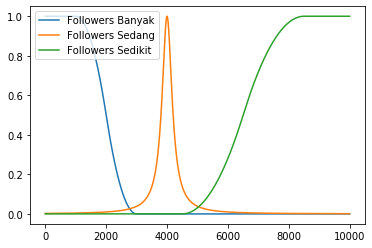

In [144]:
a = 1000.0
b = 2000.0
c = 3000.0

b2 = 4000.0
c2 = 200.0

a3 = 4500.0
b3 = 6500.0
c3 = 8500.0

def sigmoidSedikit(x):
    if (x <= a):
        return 1
    elif ((a < x) and (x <= b)):
        return 1-2*(((x-a)/(c-a))**2)    
    elif ((b < x) and (x < c)):
        return (2*((c-x)/(c-a))**2)
    elif (x >= c):
        return 0

def sigmoidSedang(x):
    return 1/(1+abs((x-b2)/c2)**2)                

def sigmoidBanyak(x):
    if (x <= a3):
        return 0
    elif ((a3 < x) and (x <= b3)):
        return 2*(((x-a3)/(c3-a3))**2)
    elif ((b3 < x) and (x < c3)):
        return 1-(2*((c3-x)/(c3-a3))**2)
    else:
        return 1

x = np.arange(0, 10000.0, 1)    

y1 = []
y2 = []
y3 = []
for i in np.nditer(x):
    y1.append(sigmoidSedikit(i))
    y2.append(sigmoidSedang(i))
    y3.append(sigmoidBanyak(i))

plt.plot(x, y1, label='Followers Banyak')    
plt.plot(x, y2, label='Followers Sedang')
plt.plot(x, y3, label='Followers Sedikit')
plt.legend(loc='upper left')

for i in Datafollowers:
    temp1 = ["Sedikit", (sigmoidSedikit(float(i)))]
    temp2 = ["Sedang", (sigmoidSedang(float(i)))]
    temp3 = ["Banyak", (sigmoidBanyak(float(i)))]
    FuzzySetFollowers.append([temp1, temp2, temp3])

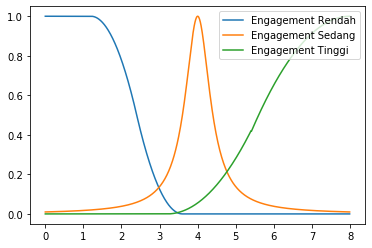

In [145]:
a = 1.2
b = 2.4
c = 3.6

b2 = 4.0
c2 = 0.4

a3 = 3.2
b3 = 5.4
c3 = 8.0

def sigmoidRendah(x):
    if (x <= a):
        return 1
    elif ((a < x) and (x <= b)):
        return 1-2*(((x-a)/(c-a))**2)
    elif ((b < x) and (x < c)):
        return (2*((c-x)/(c-a))**2)
    elif (x >= c):
        return 0
    
def sigmoidSedang(x):
    return 1/(1+abs((x-b2)/c2)**2)

def sigmoidTinggi(x):
    if (x <= a3):
        return 0
    elif ((a3 < x) and (x <= b3)):
        return 2*(((x-a3)/(c3-a3))**2)
    elif ((b3 < x) and (x < c3)):
        return 1-(2*((c3-x)/(c3-a3))**2)
    else:
        return 1          

x = np.arange(0, 8.0, 0.01)

y1 = []
y2 = []
y3 = []
for i in np.nditer(x):
    y1.append(sigmoidRendah(i))
    y2.append(sigmoidSedang(i))
    y3.append(sigmoidTinggi(i))

plt.plot(x, y1, label='Engagement Rendah')    
plt.plot(x, y2, label='Engagement Sedang')
plt.plot(x, y3, label='Engagement Tinggi')
plt.legend(loc='upper right')

for i in Datarate:
    temp1 = ["Rendah", (sigmoidRendah(float(i)))]
    temp2 = ["Sedang", (sigmoidSedang(float(i)))]
    temp3 = ["Tinggi", (sigmoidTinggi(float(i)))]
    FuzzySetRate.append([temp1, temp2, temp3])

In [0]:
Fuzzification = []
Dfuzzi = []
Cfuzzi = []

def FuzzyRule (a):
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedikit") and (a[0][1] < a[1][1])):
        return ["No", a[0][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["No", a[0][1]]   
    if ((a[0][0] == "Rendah") and (a[1][0] == "Banyak") and (a[0][1] < a[1][1])):
        return ["Considered", a[0][1]] 
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedikit") and (a[0][1] < a[1][1])):
        return ["Considered", a[0][1]]   
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["Considered", a[0][1]]      
    if ((a[0][0] == "Sedang") and (a[1][0] == "Banyak") and (a[0][1] < a[1][1])):
        return ["Ya", a[0][1]]     
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedikit") and (a[0][1] < a[1][1])):
        return ["Considered", a[0][1]]      
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["Ya", a[0][1]]    
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Banyak") and (a[0][1] < a[1][1])):
        return ["Ya", a[0][1]]    

    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedikit") and (a[0][1] >= a[1][1])):
        return ["No", a[1][1]] 
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["No", a[1][1]]      
    if ((a[0][0] == "Rendah") and (a[1][0] == "Banyak") and (a[0][1] >= a[1][1])):
        return ["Considered", a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedikit") and (a[0][1] >= a[1][1])):
        return ["Considered", a[1][1]] 
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["Considered", a[1][1]]    
    if ((a[0][0] == "Sedang") and (a[1][0] == "Banyak") and (a[0][1] >= a[1][1])):
        return ["Ya", a[1][1]]     
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedikit") and (a[0][1] >= a[1][1])):
        return ["Considered", a[1][1]]      
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["Ya", a[1][1]]    
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Banyak") and (a[0][1] >= a[1][1])):
        return ["Ya", a[1][1]]       

def disjuct (a,b) :
    temp = ["No", 0]
    temp2 = ["Considered", 0]
    temp3 = ["Ya", 0]
    for i in range(len(a)):
        if ((a[i][0]) == "No"):
            if ((a[i][1]) > temp[1]):
                temp = ["No", a[i][1]]
        elif ((a[i][0]) == "Considered"):
            if ((a[i][1]) > temp2[1]):
                temp2 = ["Considered", a[i][1]]
        elif ((a[i][0]) == "Ya"):
            if ((a[i][1]) > temp3[1]):
                temp3 = ["Ya", a[i][1]]        
    return [b+1,temp,temp2,temp3]                    

     

In [31]:
a

0.4

In [0]:
temp = []
for i in range(len(Id)):
    for j in range(len(FuzzySetFollowers[i])):
        for k in range(len(FuzzySetRate[j])):
            temp = [FuzzySetRate[i][j],FuzzySetFollowers[j][k]]
            Fuzzification.append(temp)

count = 0
temp = []
for i in range(len(Fuzzification)):
    if (count < 8):
        count += 1
        temp.append(FuzzyRule(Fuzzification[i]))
    else:
        Cfuzzi.append(temp)
        count = 0
        temp = []

for i in range(len(Cfuzzi)):
    Dfuzzi.append(disjuct(Cfuzzi[i],i))

In [0]:
Nano = 30
Mikro = 50
Medium = 100

def Sugeno(a,b,c):
    return (a*Nano + b*Mikro + c*Medium)/(a+b+c)

In [0]:
DeFuzzification = []
for i in range(len(Dfuzzi)):
    a = Dfuzzi[i][1][1]
    b = Dfuzzi[i][2][1]
    c = Dfuzzi[i][3][1]
    DeFuzzification.append([i+1,Sugeno(a,b,c)])
    
DeFuzzification = sorted(DeFuzzification, key=lambda kk: kk[1], reverse = True)

with open('Datainfluecers.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["Id","Nilai"])
    for i in range(20):
        spamwriter.writerow(DeFuzzification[i])

In [35]:
print(len(DeFuzzification))

100


In [114]:
Dfuzzi

[[1, ['Nano', 0], ['Mikro', 0], ['Medium', 0]],
 [2,
  ['Nano', 0],
  ['Mikro', 5.540387145916541e-12],
  ['Medium', 0.5599999999999999]],
 [3, ['Nano', 0], ['Mikro', 0], ['Medium', 0]],
 [4,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.16666666666666663],
  ['Medium', 0]],
 [5,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.0833333333333334],
  ['Medium', 0.1]],
 [6,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.25000000000000017],
  ['Medium', 0.05999999999999996]],
 [7,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.08333333333333341],
  ['Medium', 0]],
 [8,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.1666666666666668],
  ['Medium', 0.07999999999999999]],
 [9, ['Nano', 0], ['Mikro', 0], ['Medium', 0]],
 [10,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.6666666666666667],
  ['Medium', 0]],
 [11, ['Nano', 0], ['Mikro', 5.540387145916541e-12], ['Medium', 0.72]],
 [12,
  ['Nano', 2.1031075200728582e-10],
  ['Mikro', 0.9166666666666666],
  ['Medium', 0]],
 [13, 